Nama : Muhammad Idham Anugerah
NIM : H071201060

# Klasifikasi Kelas Pekerjaan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
ds = pd.read_csv('/content/jobclassinfo2.csv')
ds.head()

,ID,JobFamily,JobFamilyDescription,JobClass,JobClassDescription,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget,PG
0,1,1,Accounting And Finance,1,Accountant I,5,3,1,3,3,4,3,5,PG05
1,2,1,Accounting And Finance,2,Accountant II,6,4,1,5,4,5,7,7,PG06
2,3,1,Accounting And Finance,3,Accountant III,8,4,2,6,5,6,7,10,PG08
3,4,1,Accounting And Finance,4,Accountant IV,10,5,5,6,6,7,8,11,PG10
4,5,2,Administrative Support,5,Admin Support I,1,1,0,1,1,1,1,1,PG01


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    66 non-null     int64 
 1   JobFamily             66 non-null     int64 
 2   JobFamilyDescription  66 non-null     object
 3   JobClass              66 non-null     int64 
 4   JobClassDescription   66 non-null     object
 5   PayGrade              66 non-null     int64 
 6   EducationLevel        66 non-null     int64 
 7   Experience            66 non-null     int64 
 8   OrgImpact             66 non-null     int64 
 9   ProblemSolving        66 non-null     int64 
 10  Supervision           66 non-null     int64 
 11  ContactLevel          66 non-null     int64 
 12  FinancialBudget       66 non-null     int64 
 13  PG                    66 non-null     object
dtypes: int64(11), object(3)
memory usage: 7.3+ KB


In [ ]:
ds.describe()

,ID,JobFamily,JobClass,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,33.500000,7.606061,33.500000,5.696970,3.166667,1.757576,3.348485,3.606061,3.863636,4.757576,5.303030
std,19.196354,4.209436,19.196354,2.517445,1.525005,2.134411,1.767157,1.412894,2.104109,2.468638,3.525597
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,17.250000,4.000000,17.250000,4.000000,2.000000,0.000000,2.000000,3.000000,1.000000,3.000000,2.000000
50%,33.500000,7.000000,33.500000,5.000000,4.000000,1.000000,3.000000,4.000000,4.000000,6.000000,5.000000
75%,49.750000,11.000000,49.750000,8.000000,4.000000,2.750000,4.000000,5.000000,5.750000,7.000000,7.750000
max,66.000000,15.000000,66.000000,10.000000,6.000000,10.000000,6.000000,6.000000,7.000000,8.000000,11.000000


In [ ]:
ds.isnull().sum()

ID                      0
JobFamily               0
JobFamilyDescription    0
JobClass                0
JobClassDescription     0
PayGrade                0
EducationLevel          0
Experience              0
OrgImpact               0
ProblemSolving          0
Supervision             0
ContactLevel            0
FinancialBudget         0
PG                      0
dtype: int64

In [ ]:
ds.describe()

,ID,JobFamily,JobClass,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,33.500000,7.606061,33.500000,5.696970,3.166667,1.757576,3.348485,3.606061,3.863636,4.757576,5.303030
std,19.196354,4.209436,19.196354,2.517445,1.525005,2.134411,1.767157,1.412894,2.104109,2.468638,3.525597
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,17.250000,4.000000,17.250000,4.000000,2.000000,0.000000,2.000000,3.000000,1.000000,3.000000,2.000000
50%,33.500000,7.000000,33.500000,5.000000,4.000000,1.000000,3.000000,4.000000,4.000000,6.000000,5.000000
75%,49.750000,11.000000,49.750000,8.000000,4.000000,2.750000,4.000000,5.000000,5.750000,7.000000,7.750000
max,66.000000,15.000000,66.000000,10.000000,6.000000,10.000000,6.000000,6.000000,7.000000,8.000000,11.000000


In [ ]:
# Encoding the object type columns into integar 

from sklearn.preprocessing import LabelEncoder

JobFamilyDescription = LabelEncoder()
JobClassDescription  = LabelEncoder()
PG = LabelEncoder()

ds['JobFamilyDescription_n'] = JobFamilyDescription.fit_transform(ds['JobFamilyDescription'])
ds['JobClassDescription_n'] = JobClassDescription.fit_transform(ds['JobClassDescription'])
ds['PG_n']  = PG.fit_transform(ds['PG'])

In [ ]:
ds.drop(['JobFamilyDescription','JobClassDescription','PG','ID'],axis=1, inplace=True)
ds.tail()

,JobFamily,JobClass,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget,JobFamilyDescription_n,JobClassDescription_n,PG_n
61,15,62,3,1,1,1,2,1,1,1,14,61,2
62,15,63,5,4,1,3,3,4,3,4,14,62,4
63,15,64,6,5,2,4,4,5,7,5,14,63,5
64,15,65,8,5,5,6,5,6,7,7,14,64,7
65,15,66,10,5,5,6,6,7,8,11,14,65,9


In [ ]:
# Counting the label values of dataset

ds['PG_n'].value_counts()

4    15
5     7
7     7
2     7
3     7
9     6
8     6
1     5
6     4
0     2
Name: PG_n, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

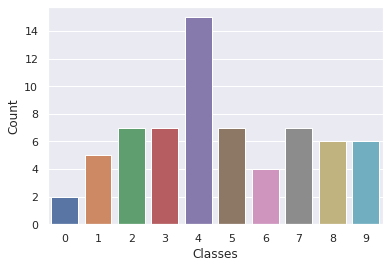

In [ ]:
# Showing the above counted values

import seaborn as sns

sns.countplot(ds['PG_n'])
plt.xlabel('Classes')
plt.ylabel("Count")

In [ ]:
# Habilitating the data

x = ds.drop(['PG_n'],axis=1)
y = ds['PG_n']

In [ ]:
# Spliting the data into train and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25)

In [ ]:
# Removing the Constant & and Quasi Constant 

from sklearn.feature_selection import VarianceThreshold
filter = VarianceThreshold()

x_train = filter.fit_transform(x_train)
x_test = filter.transform(x_test)

x_train.shape , x_test.shape

((49, 12), (17, 12))

In [ ]:
# Standarizing or Regularizing the train & test data.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train[0]

array([0.17707201, 0.26058071, 0.80632266, 1.75280336, 1.35059098,
       0.3029313 , 0.87882901, 0.91914503, 0.80410061, 1.49236258,
       0.17707201, 1.1991778 ])

In [ ]:
# Converting the training & testing labels into numpy arrays..!

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
# Importing the Decision Tree Classifier & Naive Bayes Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Training the Decision Tree Classifier & print the Accuracy score

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.9411764705882353

In [ ]:
# Training the Random Forest Classifier & print the Accuracy score

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_test,y_test)

0.8235294117647058